In [ ]:
!wget https://https://github.com/xaage/text_mining/blob/main/dataset/tripadvisor_reviews.tsv

In [2]:
# Instalamos nltk
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
# Instalamos spacy y uno de sus modelos
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
# Instalamos textacy
!pip install textacy
# Librerías tpipicas
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 16.2MB 7.2MB/s 
  Created

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import string 
import re 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from tqdm.autonotebook import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Ejercicio 1

El objetivo de este ejercicio es comprobar los conocimientos adquiridos por el alumno en temas relacionados a las posibilidades de visualización de datos textuales y el proceso de preparación de los textos.

# Apartado 1
Información básica sobre el dataset: Número de documentos, número de documentos duplicados, número de elementos en cada clase. (10%)

En primer lugar, cargamos la base de datos

In [4]:
# Cargamos la base de datos
import pandas as pd
dataset = pd.read_csv("tripadvisor_reviews.tsv", sep = "\t")

Comprobamos el tamaño del dataset:

In [5]:
# Columnas/documento
print(len(dataset))

20491


In [6]:
print(dataset.shape[1])

2


In [7]:
dataset.head()

,Review,positive
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


tenemos un problema de clasificaicon binaria........

In [8]:
dataset.positive.value_counts()


1    15093
0     5398
Name: positive, dtype: int64

In [9]:
import numpy as np
np.sum(dataset.duplicated(subset=["Review"]))

0

No hay valores vacios


In [10]:
np.sum(dataset.isnull())

Review      0
positive    0
dtype: int64

# Número de documentos

In [11]:
# Número de documentos
print("Tenemos un conjunto de {} reviews".format(len(dataset)))

Tenemos un conjunto de 20491 reviews


# Número de documentos duplicados

In [12]:
# Número de documentos duplicados
print("Existen {} reviews duplicadas".format(np.sum(dataset.duplicated(subset=["Review"]))))

Existen 0 reviews duplicadas


 # Número de elementos en cada clase

In [13]:
# Número de elementos en cada clase
dataset["positive"].value_counts()

1    15093
0     5398
Name: positive, dtype: int64

In [14]:
print("El dataframe tiene {} columnas".format(dataset.shape[1]))

El dataframe tiene 2 columnas


Dibujamos un histograma con las clases y observamos que el dataset es desbalanceado

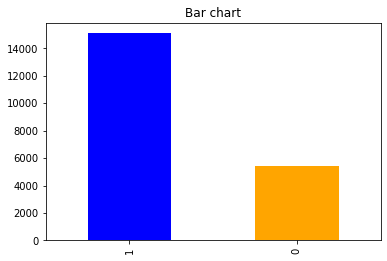

In [15]:
# Histograma con las clases 
# Se trata de un dataset desbalanceado
ax, fig = plt.subplots()
etiquetas = dataset.positive.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

# Apartado 2 
Diseñar funciones para la limpieza de los textos:

- Quitar palabras vacías. (10%)
- Quitar símbolos de puntuación. (10%)
- Lematización con Spacy. (10%)
- Tokenización con NLTK. (10%)


In [16]:
!pip install spacy
!python -m spacy download en_core_web_sm # para contenido en inglés

2021-07-12 06:54:21.868480: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.6MB 220kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
# 1) Quitar palabras vacías. 
# 2) Quitar símbolos de puntuación. 
# 3) Lematización con Spacy. 
# 4) Tokenización con NLTK. 

In [18]:
# Diseñamos funciones para la limpieza de los textos

# Eliminar espacios
def eliminar_espacios(text): 
    return  " ".join(text.split()) 

# 1) Quitar palabras vacías
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in tokens if not w in stop_words] 
    return filtered_sentence

# 2) Quitar símbolos de puntuación 
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

# 3) Lematización con Spacy
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner']) 
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

# 4) Tokenización con NLTK 
def tokenization(text): 
  tokens = word_tokenize(text) 
  return tokens 

In [19]:
# Podemos empezar con la normalización

# Quitar Espacios
dataset["normaliza"] = dataset["Review"].progress_apply(lambda x: eliminar_espacios(x))
# Tokenizar
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))
# Quitar Stopwords
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuación
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
# Stemming
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))

dataset["normaliza"]

0        nice hotel expensive parking get good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret 3rd time stay charm ca beat t...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept 17 2...
20490    people talk ca believe excellent rating hotel ...
Name: normaliza, Length: 20491, dtype: object

In [20]:
# Comprobamos 
dataset

,Review,positive,normaliza
0,nice hotel expensive parking got good deal sta...,1,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,0,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",1,great stay great stay go seahawk game awesome ...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",1,well keep secret 3rd time stay charm ca beat t...
20487,great location price view hotel great quick pl...,1,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",0,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,0,hotel theft ruin vacation hotel open sept 17 2...


In [21]:
dataset["normaliza"]

0        nice hotel expensive parking get good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret 3rd time stay charm ca beat t...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept 17 2...
20490    people talk ca believe excellent rating hotel ...
Name: normaliza, Length: 20491, dtype: object

Observamos que el proceso de lematizacion tarda un poco

# Apartado 3

Calcular y representar gráficamente en forma de distribución, como se vió en clase, las longitudes en caracteres y en tokens (despues del proceso de limpieza) de los documentos del corpus

Ahora visualizamos la longitud de en tokens de los textos una vez hecha la limpieza anterior. Observamos en el resultado que las clases se juntan y que las Reviews positivas tienen un poco mas de densidas, aunque las negativas esten bastante parecidas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


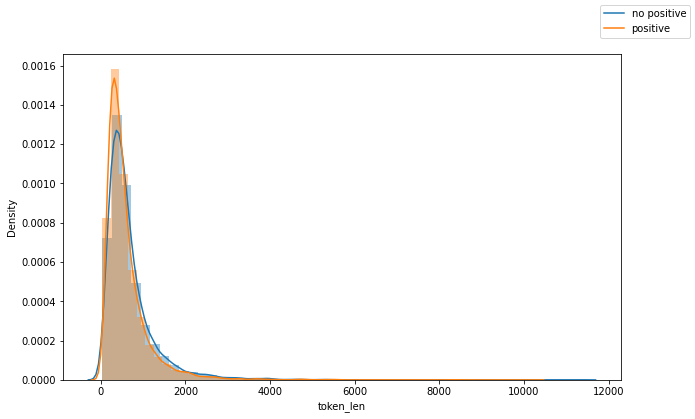

In [22]:
# Para dibujar la distribución tenemos que filtrar solo las reviews positivas
# Hacemos un filtro de una y luego de otra

dataset["token_len"] = dataset["normaliza"].apply(lambda x: len(x))

fig = plt.figure(figsize=(10,6))
plt1 = sns.distplot(dataset[dataset["positive"]==0]["token_len"], hist=True, label="no positive") # Filtamos elementos "positive"=0
plt2 = sns.distplot(dataset[dataset["positive"]==1]["token_len"], hist=True, label="positive") # Filtamos elementos "positive"=1
fig.legend(labels=['no positive','positive'])
plt.show()

# Apartado 4

Cálcular y representar gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases del corpus despues del proceso de limpieza (25%)

In [23]:
# Extraemos y transformamos la columna en una lista para trabajar más comodo
texto_reviews = dataset["normaliza"].to_list()


In [24]:
# Comprobamos que es una lista
print(type(texto_reviews))

<class 'list'>


In [25]:
# Cogemos un subset de las 100 reviews para acelerar el proceso
subset_reviews = texto_reviews[0:100]

A continuación, vamos a calcular los tokens de todo el corpus de documentos y vamos a generar una visualización. Para ello hemos creado function frecuencia_tokens que vamos a utilizar.

In [26]:
# Utilizamos la function frecuencia_tokens
def frecuencia_tokens(lista): 
    # Creamos diccionario vacío 
    frecuencia = {} 
    for item in lista: 
        if (item in frecuencia): 
            frecuencia[item] += 1
        else: 
            frecuencia[item] = 1
    return frecuencia

Creamos una lista de tokens al introducir los elementos


In [27]:
# Extraermos los tokens de todos los textos y los introducimos en una lista común:
lista_tokens = list()
for i in subset_reviews:
  # Tokenizamos cada documento con word_tokenize()
  tokens_document = word_tokenize(i)
  # Añadimos esos tokens como nuevos elementos
  # Si usamos append se crearía una lista de listas, de este modo añadimos los
  # Elementos de la segunda lista
  lista_tokens.extend(tokens_document)

# Calculemos la frecuencia
dict_freq = frecuencia_tokens(lista_tokens)

Vamos a ordenar el diccionario, para tomar sólo los valores mayores de 60:

In [28]:
# Ordenamos el diccionario por la frecuencia de sus palabras
# Con sólo los valores mayores de 60
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
  if i[1] > 60:
    token_names.append(i[0])
    token_freqs.append(i[1])

Por ultimo representamos gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

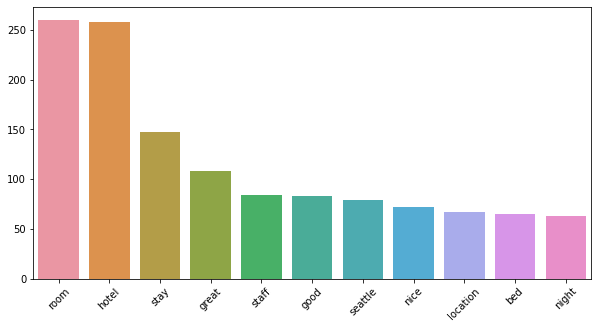

In [29]:
# Dibujamos
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=45)